# Football Player Position Classification (2025–2026)

#### Name: Ameer Khan 
#### Date: 9/22/2025

### Introduction: Problem
Problem statement (short): This project predicts a football player's position (Forward, Midfielder, Defender, Goalkeeper) from match/statistical data for the 2025–2026 season. Using the players_data-2025_2026.csv file, the goal is to train and evaluate classification models that learn the statistical signatures of each position.

Why this matters: Positions often map to clear statistical patterns (goals, tackles, saves, passes). A successful model can validate these patterns, help scouts analyze player roles, flag mislabeled players, or assist in automated tagging for analytics platforms.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


# Load dataset
df = pd.read_csv("../datasets/players_data-2025_2026.csv")


# Preview dataset
df.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Att (GK),Thr,Launch%,AvgLen,Opp,Stp,Stp%,#OPA,#OPA/90,AvgDist
0,1,Brenden Aaronson,us USA,FW,Leeds United,eng Premier League,24.0,2000.0,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Jones El-Abdellaoui,ma MAR,"MF,DF",Celta Vigo,es La Liga,19.0,2006.0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Himad Abdelli,dz ALG,MF,Angers,fr Ligue 1,25.0,1999.0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Salis Abdul Samed,gh GHA,MF,Nice,fr Ligue 1,25.0,2000.0,3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Saud Abdulhamid,sa KSA,DF,Lens,fr Ligue 1,26.0,1999.0,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---
# Data
The dataset comes from Kaggle: Football Players Stats 2025–2026. It contains detailed performance data for players in the top five European football leagues.

Target variable: Pos (position: FW, MF, DF, GK)

Features (examples):

    Gls (Goals scored)

    Ast (Assists)

    xG (Expected goals)

    Tkl (Tackles)

    Int (Interceptions)

    Saves (Goalkeeper saves)

    Cmp% (Pass completion percentage)

These features represent different aspects of football performance that should correlate with position.



# Pre-processing the Data
Before modeling, I cleaned and prepared the data. Each step has a purpose:

1. Select relevant features → removed irrelevant columns (player name, nationality, etc.).

2. Handle missing values → filled missing stats with zeros or averages.

3. Encode categorical target → converted Pos into numeric labels.

4. Scale features → standardized values so that different scales (like goals vs. saves) don’t dominate the model.

In [6]:
# Keep only relevant columns
features = ["Gls", "Ast", "xG", "xAG", "Sh", "SoT", "Cmp%", "Tkl", "Int", "Blocks", "Saves"]
target = "Pos"


# Drop rows with missing target
df = df.dropna(subset=[target])


# Handle missing values
df = df[features + [target]].fillna(0)


# Encode target variable
le = LabelEncoder()
df[target] = le.fit_transform(df[target])


X = df[features]
y = df[target]


# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Data Understanding / Visualization

I explored the dataset to check how statistics align with positions.

Forwards have higher goals and shots.

Defenders and midfielders have more tackles and interceptions.

Goalkeepers dominate in saves.

How this relates to modeling: Understanding feature distributions helps explain why classification works—there are statistical patterns unique to positions.


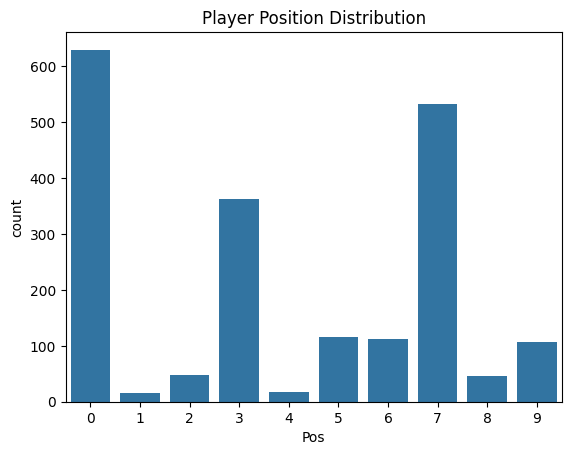

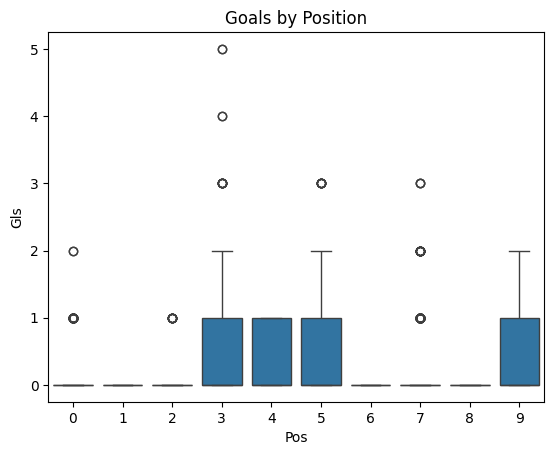

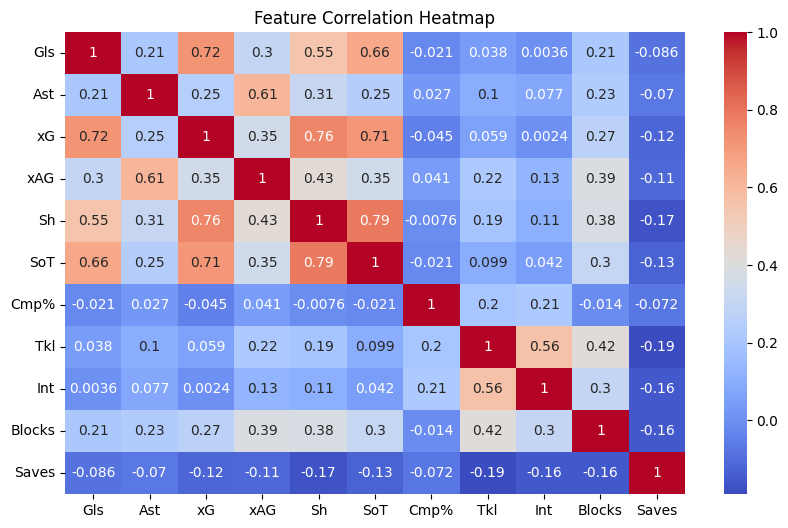

In [7]:
# Distribution of positions
sns.countplot(x=target, data=df)
plt.title("Player Position Distribution")
plt.show()


# Goals by position
sns.boxplot(x=target, y="Gls", data=df)
plt.title("Goals by Position")
plt.show()


# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df[features].corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# Modeling
I used multiple classification models to compare performance:

Logistic Regression
    Linear model, interpretable.
    Pros: simple, fast. Cons: struggles with non-linear data.

K-Nearest Neighbors (KNN)
    Predicts based on closest neighbors.
    Pros: intuitive. Cons: slow with large datasets.

Random Forest
    Ensemble of decision trees.
    Pros: strong accuracy, shows feature importance. Cons: less interpretable.

Support Vector Machine (SVM)
    Separates classes with maximum margin.
    Pros: effective with clear boundaries. Cons: slow on large data.

In [8]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)


# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)


# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


# SVM
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Evaluation 
I used accuracy, F1-score, and confusion matrices to evaluate models. Accuracy shows overall performance, while F1-score balances precision and recall, which is important since some positions (like Goalkeepers) are underrepresented.

===== Logistic Regression =====
Accuracy: 0.4723618090452261
Classification Report:
               precision    recall  f1-score   support

          DF       0.46      0.76      0.57       115
       DF,FW       0.00      0.00      0.00         5
       DF,MF       0.00      0.00      0.00        10
          FW       0.57      0.56      0.57        80
       FW,DF       0.00      0.00      0.00         2
       FW,MF       0.00      0.00      0.00        28
          GK       1.00      1.00      1.00        15
          MF       0.36      0.37      0.36       110
       MF,DF       0.00      0.00      0.00         8
       MF,FW       0.00      0.00      0.00        25

    accuracy                           0.47       398
   macro avg       0.24      0.27      0.25       398
weighted avg       0.38      0.47      0.42       398



c:\Users\joe\Desktop\ITCS3162_DataMining\itcs3162_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\joe\Desktop\ITCS3162_DataMining\itcs3162_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\joe\Desktop\ITCS3162_DataMining\itcs3162_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

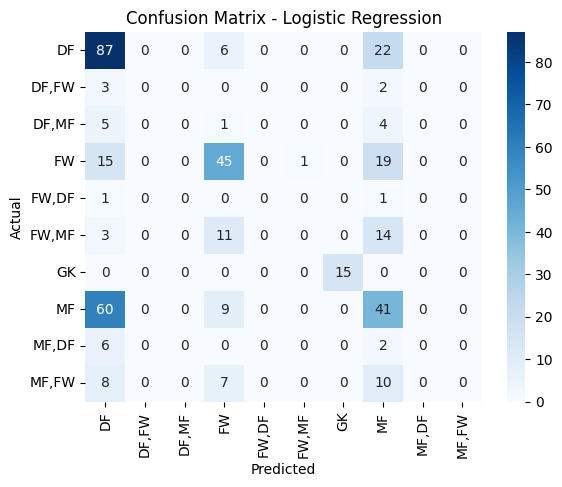

===== KNN =====
Accuracy: 0.4020100502512563
Classification Report:
               precision    recall  f1-score   support

          DF       0.40      0.66      0.50       115
       DF,FW       0.00      0.00      0.00         5
       DF,MF       0.00      0.00      0.00        10
          FW       0.50      0.46      0.48        80
       FW,DF       0.00      0.00      0.00         2
       FW,MF       0.20      0.11      0.14        28
          GK       1.00      1.00      1.00        15
          MF       0.31      0.26      0.28       110
       MF,DF       0.00      0.00      0.00         8
       MF,FW       0.00      0.00      0.00        25

    accuracy                           0.40       398
   macro avg       0.24      0.25      0.24       398
weighted avg       0.35      0.40      0.37       398



c:\Users\joe\Desktop\ITCS3162_DataMining\itcs3162_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\joe\Desktop\ITCS3162_DataMining\itcs3162_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\joe\Desktop\ITCS3162_DataMining\itcs3162_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

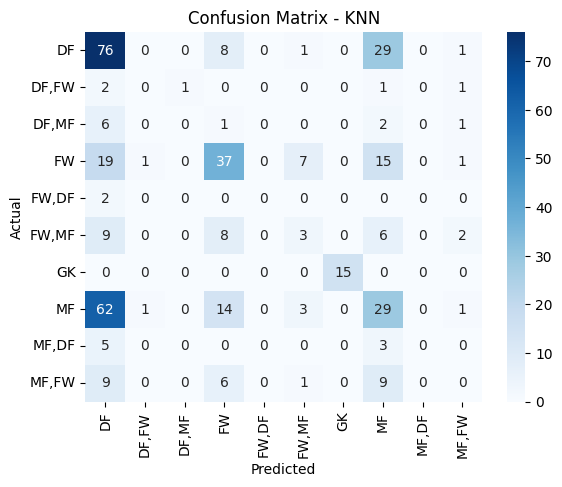

===== Random Forest =====
Accuracy: 0.4648241206030151
Classification Report:
               precision    recall  f1-score   support

          DF       0.49      0.70      0.58       115
       DF,FW       0.00      0.00      0.00         5
       DF,MF       0.00      0.00      0.00        10
          FW       0.50      0.55      0.52        80
       FW,DF       0.00      0.00      0.00         2
       FW,MF       0.40      0.07      0.12        28
          GK       1.00      1.00      1.00        15
          MF       0.36      0.39      0.38       110
       MF,DF       0.00      0.00      0.00         8
       MF,FW       0.00      0.00      0.00        25

    accuracy                           0.46       398
   macro avg       0.28      0.27      0.26       398
weighted avg       0.41      0.46      0.42       398



c:\Users\joe\Desktop\ITCS3162_DataMining\itcs3162_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\joe\Desktop\ITCS3162_DataMining\itcs3162_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\joe\Desktop\ITCS3162_DataMining\itcs3162_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

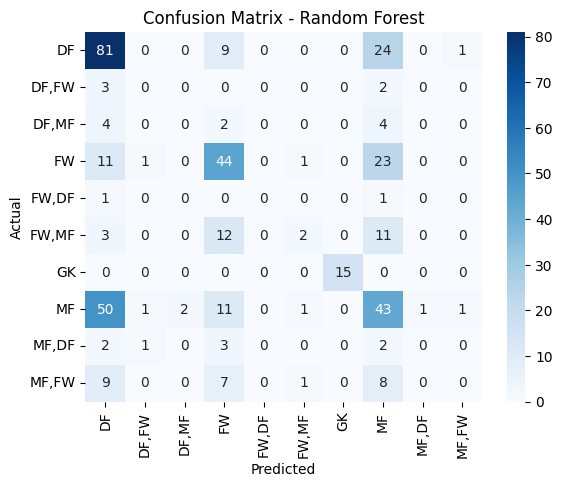

===== SVM =====
Accuracy: 0.4547738693467337
Classification Report:
               precision    recall  f1-score   support

          DF       0.44      0.77      0.56       115
       DF,FW       0.00      0.00      0.00         5
       DF,MF       0.00      0.00      0.00        10
          FW       0.59      0.55      0.57        80
       FW,DF       0.00      0.00      0.00         2
       FW,MF       0.00      0.00      0.00        28
          GK       1.00      1.00      1.00        15
          MF       0.31      0.31      0.31       110
       MF,DF       0.00      0.00      0.00         8
       MF,FW       0.00      0.00      0.00        25

    accuracy                           0.45       398
   macro avg       0.23      0.26      0.24       398
weighted avg       0.37      0.45      0.40       398



c:\Users\joe\Desktop\ITCS3162_DataMining\itcs3162_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\joe\Desktop\ITCS3162_DataMining\itcs3162_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\joe\Desktop\ITCS3162_DataMining\itcs3162_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

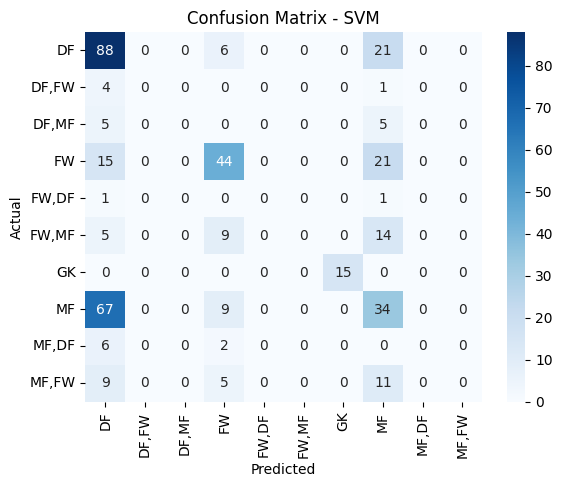

In [10]:
def evaluate_model(name, y_true, y_pred):
    print(f"===== {name} =====")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred, target_names=le.classes_))
    
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


# Evaluate all models
evaluate_model("Logistic Regression", y_test, y_pred_lr)
evaluate_model("KNN", y_test, y_pred_knn)
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("SVM", y_test, y_pred_svm)


# Storytelling


# Impact Section

